**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> Introduction to SymPy</font>**  

<a id=table_of_contents></a>
###  Table of Contents 


* [What is SymPy?](#sympy) - a brief description of SymPy


* [Basic objects and functions](#basics) - creating symbolic objects, attributes, functions and basic manipulation


* [Numbers](#numbers) - number classes and basic operations 


* [Handling and evaluating symbolic expressions](#hand_eval) - simplification, factorization and numerical evaluation of symbolic expressions 


* [Calculus](#calculus) - some examples of integration, differentiation, limits and series expansion 


* [Solvers](#solvers) - solving equations


* [Linear Algebra](#linear_algebra) - working with matrices


* [References](#references)


**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=sympy></a>
# <font color=brown> What is SymPy?</font>

[SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

There are many computer algebra systems out there. [This](https://en.wikipedia.org/wiki/List_of_computer_algebra_systems) Wikipedia article lists many of them. What makes SymPy a better choice than the alternatives? 

First off, SymPy is completely free. It is open source, and licensed under the liberal BSD license, so you can modify the source code and even sell it if you want to. This contrasts with popular commercial systems like Maple or Mathematica that cost hundreds of dollars in licenses.

Second, SymPy uses Python. Most computer algebra systems invent their own language. Not SymPy. SymPy is written entirely in Python, and is executed entirely in Python. This means that if you already know Python, it is much easier to get started with SymPy, because you already know the syntax (and if you don’t know Python, it is really easy to learn). We already know that Python is a well-designed, battle-tested language. The SymPy developers are confident in their abilities in writing mathematical software, but programming language design is a completely different thing. By reusing an existing language, we are able to focus on those things that matter: the mathematics.

Another computer algebra system, Sage also uses Python as its language. But Sage is large, with a download of over a gigabyte. An advantage of SymPy is that it is lightweight. In addition to being relatively small, it has no dependencies other than Python, so it can be used almost anywhere easily. Furthermore, the goals of Sage and the goals of SymPy are different. Sage aims to be a full featured system for mathematics, and aims to do so by compiling all the major open source mathematical systems together into one. When you call some function in Sage, such as `integrate`, it calls out to one of the open source packages that it includes. In fact, SymPy is included in Sage. SymPy on the other hand aims to be an independent system, with all the features implemented in SymPy itself.

A final important feature of SymPy is that it can be used as a library. Many computer algebra systems focus on being usable in interactive environments, but if you wish to automate or extend them, it is difficult to do. With SymPy, you can just as easily use it in an interactive Python environment or import it in your own Python application. SymPy also provides APIs to make it easy to extend it with your own custom functions.

***
<a id=basics></a>
# <font color=brown> Basic objects and functions</font>

Importing *sympy* library. 

In [76]:
# from sympy import *
import sympy as sym

In order to display output in an easy-to-read format, we need to add the following line. Or alternatively you can use `latex()` function within the `print()` function to show LaTeX format. Some other printing formats are also possible (see [documentation](https://docs.sympy.org/latest/tutorial/printing.html#printers) for more details.)

In [77]:
sym.init_printing()

### Creating symbolic objects

Unlike many symbolic manipulation systems you may have used, in SymPy, variables are not defined automatically. To define variables, we must use `symbols` (from now on, symbol objects, which are instances of the class sympy.Symbols will simply be called symbols.).

In [3]:
x = sym.symbols('x')

In [7]:
x + 1

Note that the name of a symbol and the name of the variable it is assigned to need not have anything to do with one another.

In [4]:
a, b = sym.symbols('b a')
a, b

(b, a)

To avoid confusion, throughout this tutorial, symbol names and Python variable names will always coincide. Furthermore, the word "Symbol" will refer to a SymPy symbol and the word "variable" will refer to a Python variable.

Finally, let us be sure we understand the difference between SymPy symbols and Python variables. Consider the following:

In [5]:
x = sym.symbols('x')
expr = x + 1
x = 2
print(expr)

x + 1


Changing `x` to `2` had no effect on `expr`. This is because `x = 2` changes the Python variable `x` to `2`, but has no effect on the SymPy symbol `x`, which was what we used in creating `expr`. When we created `expr`, the Python variable `x` was a symbol. After we created, it, we changed the Python variable `x` to `2`. But `expr` remains the same. This behavior is not unique to SymPy. All Python programs work this way: if a variable is changed, expressions that were already created with that variable do not change automatically. For example

In [6]:
x = 'abc'
expr = x + 'def'
expr

'abcdef'

In [7]:
x = 'ABC'
expr

'abcdef'

Another very important consequence of the fact that SymPy does not extend Python syntax is that `=` does not represent equality in SymPy. Rather it is Python variable assignment. This is hard-coded into the Python language, and SymPy makes no attempts to change that.

You may think, however, that `==`, which is used for equality testing in Python, is used for SymPy as equality. This is not quite correct either. Let us see what happens when we use `==`.

In [8]:
x + sym.Integer(1) == sym.Integer(4)

False

Instead of treating `x + 1 == 4` symbolically, we just got False. In SymPy, `==` represents exact structural equality testing. This means that `a == b` means that we are asking if $a=b$. We always get a bool as the result of `==`. There is a separate object, called `Eq`, which can be used to create symbolic equalities.

In [76]:
sym.Eq(x + sym.Integer(1), sym.Integer(4))

There is one additional caveat about `==` as well. Suppose we want to know if $(x+1)2=x2+2x+1$. We might try something like this:

In [77]:
(x + sym.Integer(1))**2 == x**2 + 2*x + sym.Integer(1)

False

We got False again. However, $(x+1)^2$ does equal $x^2+2x+1$. What is going on here? Did we find a bug in SymPy, or is it just not powerful enough to recognize this basic algebraic fact?

Recall from above that `==` represents exact structural equality testing. "Exact" here means that two expressions will compare equal with `==` only if they are exactly equal structurally. Here, $(x+1)^2$ and $x^2+2x+1$ are not the same symbolically. One is the power of an addition of two terms, and the other is the addition of three terms.

It turns out that when using SymPy as a library, having `==` test for exact structural equality is far more useful than having it represent symbolic equality, or having it test for mathematical equality. However, as a new user, you will probably care more about the latter two. We have already seen an alternative to representing equalities symbolically, `Eq`. To test if two things are equal, it is best to recall the basic fact that if $a=b$, then $a−b=0$. Thus, the best way to check if $a=b$ is to take $a−b$ and simplify it, and see if it goes to $0$. We will learn later that the function to do this is called `simplify`. This method is not infallible—in fact, it can be [theoretically proven](https://en.wikipedia.org/wiki/Richardson%27s_theorem) that it is impossible to determine if two symbolic expressions are identically equal in general—but for most common expressions, it works quite well.

In [9]:
a = (x + sym.Integer(1))**2
b = x**2 + 2*x + sym.Integer(1)
sym.simplify(a-b)

In [10]:
c = x**2 - 2*x + sym.Integer(1) 
sym.simplify(a-c)

There is also a method called `equals` that tests if two expressions are equal by evaluating them numerically at random points.

In [80]:
a = sym.cos(x)**2 - sym.sin(x)**2
b = sym.cos(2*x)
a.equals(b)

True

You may have noticed that we have been using `**` for exponentiation instead of the standard `^`. That's because SymPy follows Python's conventions. In Python, `^` represents logical exclusive or. SymPy follows this convention.

In [14]:
True ^ False

True

In [15]:
True ^ True

False

In [17]:
x, y = sym.symbols('x, y')
sym.Xor(x, y)

Xor(x, y)

Finally, a small technical discussion on how SymPy works is in order. When you type something like `x + 1`, the SymPy symbol `x` is added to the Python int `1`. Python's operator rules then allow SymPy to tell Python that SymPy objects know how to be added to Python ints, and so `1` is automatically converted to the SymPy Integer object.

This sort of operator magic happens automatically behind the scenes, and you rarely need to even know that it is happening. However, there is one exception. Whenever you combine a SymPy object and a SymPy object, or a SymPy object and a Python object, you get a SymPy object, but whenever you combine two Python objects, SymPy never comes into play, and so you get a Python object.

In [19]:
type(sym.Integer(1) + 1)

sympy.core.numbers.Integer

In [20]:
type(1 + 1)

int

This is usually not a big deal. Python ints work much the same as SymPy Integers, but there is one important exception: division. In SymPy, the division of two Integers gives a Rational.

In [21]:
sym.Integer(1)/sym.Integer(3)

1/3

In [22]:
type(sym.Integer(1)/sym.Integer(3))

sympy.core.numbers.Rational

But in Python `/` represents either integer division or floating point division, depending on whether you are in Python 2 or Python 3, and depending on whether or not you have run `from __future__ import division`.

In [23]:
from __future__ import division
1/2

0.5

To avoid this, we can construct the rational object explicitly.

In [24]:
sym.Rational(1, 2)

1/2

This problem also comes up whenever we have a larger symbolic expression with `int/int` in it. For example:

In [25]:
x + 1/2

x + 0.5

This happens because Python first evaluates `1/2` into `0.5`, and then that is cast into a SymPy type when it is added to `x`. Again, we can get around this by explicitly creating a Rational:

In [26]:
x + sym.Rational(1, 2)

x + 1/2

### Other ways of creating symbolic objects

The simplest way to create a symbol.

In [35]:
x = sym.Symbol("x")
x

Creating a symbol with some specified attribute. 

In [36]:
alpha = sym.Symbol("alpha", real=True)
beta = sym.Symbol("beta", integer=True)
alpha, beta

Creating multiple symbols all at once, using `sympy.symbols()`.

In [37]:
alpha, beta, gamma = sym.symbols("alpha, beta, gamma", positive=True, real=True)
alpha, beta, gamma

Creation of multiple symbols all at once, using `sympy.var()`.

In [38]:
alpha1, beta1, gamma1 = sym.var("alpha1, beta1, gamma1", positive=True, real=True)
alpha1, beta1, gamma1

### Attributes of symbolic variable

In [39]:
alpha = sym.var("alpha", real=True, integer=False, positive=True)
alpha

In [40]:
alpha.is_real

True

In [41]:
alpha.is_complex

True

In [42]:
alpha.is_imaginary

False

In [43]:
alpha.is_positive

True

In [44]:
alpha.is_negative

False

In [45]:
alpha.is_zero

False

In [46]:
alpha.is_nonzero

True

In [47]:
alpha.is_even

False

In [48]:
alpha.is_odd

False

In [49]:
alpha.is_integer

False

In [50]:
alpha.is_prime

False

In [51]:
alpha.is_finite

In [52]:
alpha.is_infinite

### Functions, elementary functions and special functions

Sympy objects that represent functions can be created with `sympy.Function()`. User-defined functions can be created with `sympy.Lambda()`. Sympy also has a wide variety of predefined functions, such as `sympy.sin()` and `sympy.cos()`.

In [53]:
# square root
sym.sqrt(x + 1)

In [54]:
# sine
sym.sin(x)

In [55]:
# cosine
sym.cos(x)

In [56]:
# log
sym.log(1 - x)

In [57]:
# exponential 
sym.exp(x)

In [123]:
k, m, n = sym.symbols('k m n')

In [124]:
# factorial function
sym.factorial(n)

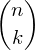

In [126]:
# binomial coefficient function
sym.binomial(n, k)

In [128]:
# Gamma function (closely related to factorial function)
sym.gamma(z)

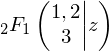

In [130]:
# generalized hypergeometric function 
sym.hyper([1, 2], [3], z)

Creating an undefined function with an arbitrary number of input variables. 

In [58]:
f = sym.Function("f")
f

f

An undefined function of one variable. 

In [59]:
x = sym.symbols("x")
f = sym.Function("f")(x)
f

An undefined function of two variables. 

In [60]:
x, y = sym.symbols("x, y")
f = sym.Function("f")(x, y)
f

Creating a user-defined function.

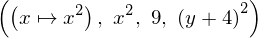

In [61]:
f = sym.Lambda(x, x**2)
f, f(x), f(3), f(y + 4)

***
<a id=numbers></a>
# <font color=brown> Numbers</font>

As we remarked above, SymPy provides its own integer and float classes, `sympy.Integer` and `sympy.Float`, respectively. These are distinct from the int and float types in Python. One of the main differences is that `sympy.Integer` and `sympy.Float` have arbitrary precision, whereas int and float do not. 

In addition to integers and floats, sympy also provides a class for rational numbers, `sympy.Rational`.

Finally, *sympy* provides predefined symbols for various special constants used in mathematics, such as $\pi$ and $e$.

This is a Python integer. 

In [62]:
a = 3
type(a)

int

This is a *sympy* integer.

In [63]:
b = sym.Integer(3)
type(b)

sympy.core.numbers.Integer

Instances of `sympy.Integer` have the attribute `Integer` (capital "I"), as well as the attribute `integer` (lower case "i"). 

In [64]:
b = sym.Integer(8)
b.is_Integer, b.is_integer

(True, True)

Instances of `sympy.Symbols` with `integer=True`, have the attribute `integer` (lower case "i"), but do NOT have the attribute `Integer` (capital "I"). 

In [65]:
c = sym.symbols("c", integer=True)
c.is_integer, c.is_Integer

(True, False)

This is a Python float. 

In [66]:
a = 3.0
type(a)

float

This is a *sympy* float.

In [67]:
b = sym.Float(3.0)
type(b)

sympy.core.numbers.Float

This is a Python float to 25 digit precision. 

In [68]:
a = "%.25f" % 0.3
a

'0.2999999999999999888977698'

This is a *sympy* float with 25 digit precision. 

In [69]:
b = sym.Float('0.3', 25)
b

Here we have another examples of *sympy* rationals. 

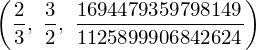

In [70]:
a = sym.Rational(2, 3)
b = sym.Rational(3, 2)
c = sym.Rational(3.01, 2)
a, b, c

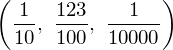

In [71]:
d = sym.Rational('0.1')
e = sym.Rational('1.23')
f = sym.Rational('1e-4')
d, e, f

Algebraic operations between *sympy* rationals preserve the type. 

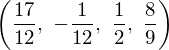

In [72]:
a = sym.Rational(2,3)
b = sym.Rational(3,4)
a+b, a-b, a*b, a/b

Finally we present some predefined special symbols in *numpy*.

In [74]:
sym.pi, sym.E, sym.EulerGamma, sym.I, sym.oo

***
<a id=hand_eval></a>
# <font color=brown> Handling and evaluating symbolic expressions</font>

### Manipulating expressions

Expressions are formed by combining symbols and functions. There are numerous ways of manipulating expressions. Many of these are illustrated in the examples below.

Creating an expression. 

In [81]:
x, y = sym.symbols("x, y")
expr = 1 + 2*x*y + 3*x**2
expr

Simplification of expression. 

In [82]:
x = sym.symbols("x")
expr1 = 2*(x**2 - x) - x*(x + 1)
expr2 = sym.simplify(expr1)
expr1, expr2

Another way to simplify an expression. 

In [83]:
x = sym.symbols("x")
expr1 = 2*(x**2 - x) - x*(x + 1)
expr2 = expr1.simplify()
expr1, expr2

Simplification of expression using trigonometric identities. 

In [84]:
x = sym.symbols("x")
expr = 2*sym.cos(x)*sym.sin(x)
expr, expr.trigsimp()

Simplification of expression using laws of powers. 

In [85]:
x, y = sym.symbols("x, y")
expr = sym.exp(x)*sym.exp(y)
expr, expr.powsimp()

Simplification of expression by combining common denominator. 

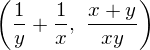

In [86]:
x, y = sym.symbols("x, y")
expr = 1/x + 1/y
expr, expr.ratsimp()

Expanding an expression. 

In [87]:
x = sym.symbols("x")
expr = (1 + x)*(2 + x)
expr, sym.expand(expr)

Another way to expand an expression. 

In [88]:
x = sym.symbols("x")
expr = (1 + x)*(2 + x)
expr, expr.expand()

Expanding a trigonometric expression. 

In [89]:
x, y = sym.symbols("x, y")
expr = sym.sin(x + y)
expr, expr.expand(trig=True)

Expanding a logarithmic expression. 

In [90]:
x, y = sym.symbols("x, y",positive=True)
expr = sym.log(x*y)
expr, expr.expand(log=True)

Splitting a complex expression into real and imaginary part. 

In [91]:
x, y = sym.symbols("x, y", real=True)
expr = sym.exp(x + y*sym.I)
expr, expr.expand(complex=True)

Expanding the base of a power expression. 

In [92]:
a, b = sym.symbols("a, b", positive=True)
x = sym.symbols("x")
expr = (a*b)**x
expr, expr.expand(power_base=True)

Expanding the exponent of a power expression.

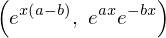

In [93]:
a, b = sym.symbols("a, b", positive=True)
x = sym.symbols("x")
expr = sym.exp((a - b)*x)
expr, expr.expand(power_exp=True)

Factorization of expression. 

In [94]:
x = sym.symbols("x")
expr = x**2 -1
expr, expr.factor()

Combining logarithmic expressions. 

In [95]:
x, y = sym.symbols("x, y",positive=True)
expr = sym.log(x) + sym.log(y)
expr, sym.logcombine(expr)

Collecting terms containing a given symbol. 

In [96]:
x, y, z = sym.symbols("x, y, z")
expr = x + y + x*y*z
expr, expr.collect(x), expr.collect(y)

Breaking a fraction into partial fractions. 

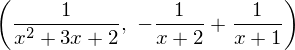

In [97]:
x = sym.symbols("x")
expr = 1/(x**2 + 3*x + 2)
expr, expr.apart(x)

Combining partial fractions into a single fraction. 

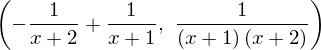

In [98]:
x = sym.symbols("x")
expr = 1/(x + 1) - 1/(x + 2)
expr, expr.together()

Cancelling common factor. 

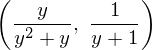

In [99]:
x, y = sym.symbols("x, y")
expr = y/(y + y**2)
expr, expr.cancel(y)

Substituting one symbol for another in expression. 

In [100]:
x, y = sym.symbols("x, y")
expr = x + 2
expr, expr.subs(x,y)

Making multiple symbols substitution in expression. 

In [101]:
x, y, z = sym.symbols("x, y, z")
a, b, c = sym.symbols("a, b, c")
expr = sym.sin(x) + sym.exp(y) + z
expr, expr.subs({x:a, y:b, z:c})

Making numeric substitution in expression. 

In [102]:
x = sym.symbols("x")
a, b, c = sym.symbols("a, b, c")
expr = a + b*x + c*x**2
params = {a:1.2, b:2, c:-5}
expr, expr.subs(params)

Substituting expressions in expression. 

In [103]:
x, y, z = sym.symbols("x, y, z")
expr = sym.sin(x) + sym.exp(y) + z
expr, expr.subs({sym.sin(x): x**2, sym.exp: sym.cos, z: sym.log(x)})

### Converting strings to SymPy expressions

The `sympify` function (that's `sympify`, not to be confused with `simplify`) can be used to convert strings into SymPy expressions.

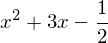

In [105]:
str_expr = "x**2 + 3*x - 1/2"
expr = sym.sympify(str_expr)
expr

### Numerical evaluation of symbolic expressions

There are several functions useful for numerical evaluation of symbolic expressions, for instance `N()`, `evalf()` or `lambdify()`. 

Evaluation of $\pi$. 

In [106]:
pi = sym.pi
sym.N(pi, 50)

In [111]:
pi.evalf()

In [112]:
pi.evalf(50)

Evaluating $\pi$ in expression. 

In [113]:
x = sym.symbols("x")
pi = sym.pi
expr = x + pi
sym.N(expr)

In [114]:
expr.evalf()

Evaluation of user-defined function. 

In [115]:
f = sym.Lambda(x, expr)
f, f(x), f(2),  sym.N(f(2))

In [116]:
f, f(x), f(2),  f(2).evalf()

Making a user-defined scalar function which returns numerical evaluations. 

In [117]:
x = sym.symbols("x")
pi = sym.pi
expr = x + pi
g = sym.lambdify(x, expr)
g, g(x), g(2)

(<function _lambdifygenerated>, x + 3.14159265358979, 5.141592653589793)

Making a user-defined vectorized function which returns numerical evaluations. 

In [118]:
x = sym.symbols("x")
pi = sym.pi
expr = x + pi

In [119]:
f = sym.lambdify(x, expr, 'numpy')

In [120]:
import numpy as np
xvals = np.arange(0,10)

In [121]:
f(xvals)

array([ 3.14159265,  4.14159265,  5.14159265,  6.14159265,  7.14159265,
        8.14159265,  9.14159265, 10.14159265, 11.14159265, 12.14159265])

***
<a id=calculus></a>
# <font color=brown> Calculus</font>

### Derivatives

In [3]:
x, y, z = sym.symbols('x y z')

To take derivatives, use the `diff` function. 

In [6]:
sym.diff(sym.cos(x), x)

In [7]:
sym.diff(sym.exp(x**2), x)

`diff` can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. For example, both of the following find the third derivative of $x^4$.

In [9]:
sym.diff(x**4, x, x, x)

In [10]:
sym.diff(x**4, x, 3)

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives. For example, each of the following will compute $\dfrac{\partial}{\partial x \partial y^2 \partial z^4} e^{xyz}$.

In [15]:
expr = sym.exp(x*y*z)
sym.diff(expr, x, y, y, z, z, z, z)

In [16]:
sym.diff(expr, x, y, 2, z, 4)

In [17]:
sym.diff(expr, x, y, y, z, 4)

`diff` can also be called as a method. The two ways of calling diff are exactly the same, and are provided only for convenience.

In [18]:
expr.diff(x, y, y, z, 4)

To create an unevaluated derivative, use the `Derivative` class. It has the same syntax as `diff`.

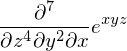

In [22]:
deriv = sym.Derivative(expr, x, y, y, z, 4)
deriv

To evaluate an unevaluated derivative, use the `doit` method.

In [23]:
deriv.doit()

These unevaluated objects are useful for delaying the evaluation of the derivative, or for printing purposes. They are also used when SymPy does not know how to compute the derivative of an expression (for example, if it contains an undefined function, which are described in the Solving Differential Equations section).

Derivatives of unspecified order can be created using tuple `(x, n)` where `n` is the order of the derivative with respect to `x`.

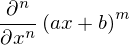

In [24]:
m, n, a, b = sym.symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))

Oridinary derivative of an undefined function in one variable. 

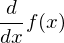

In [25]:
x = sym.symbols("x")
f = sym.Function("f")(x)
sym.diff(f, x)

### Integrals

To compute an integral, use the `integrate` function. There are two kinds of integrals, definite and indefinite. To compute an indefinite integral, that is, an antiderivative, or primitive, just pass the variable after the expression.

In [27]:
sym.integrate(sym.cos(x), x)

Note that SymPy does not include the constant of integration. If you want it, you can add one yourself, or rephrase your problem as a differential equation and use `dsolve` to solve it, which does add the constant.

To compute a definite integral, pass the argument (i`ntegration_variable, lower_limit, upper_limit`). For example, to compute $\displaystyle\int_{0}^{\infty}e^{-x}dx$ we would do the following. 

In [34]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

$\displaystyle\int_{0}^{5}e^{-x}dx$

In [35]:
sym.integrate(sym.exp(-x), (x, 0, 5))

In [36]:
sym.N(sym.integrate(sym.exp(-x), (x, 0, 5)))

As with indefinite integrals, you can pass multiple limit tuples to perform a multiple integral. For example, to compute $\displaystyle\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-x^2-y^2}dx\,dy$ do

In [39]:
sym.integrate(sym.exp(-x**2 - y**2), (x, -sym.oo, sym.oo), (y, -sym.oo, sym.oo))

If `integrate` is unable to compute an integral, it returns an unevaluated Integral object.

In [40]:
expr = sym.integrate(x**x, x) 
print(expr)

Integral(x**x, x)


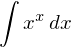

In [42]:
expr

Indefinite integral of an undefined function in one variable. 

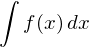

In [53]:
x = sym.symbols("x")
f = sym.Function("f")(x)
sym.integrate(f)

Another way to take an indefinite integral. 

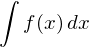

In [54]:
x = sym.symbols("x")
f = sym.Function("f")(x)
f.integrate()

As with `Derivative`, you can create an unevaluated integral using `Integral`. To later evaluate this integral, call `doit`.

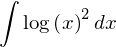

In [44]:
expr = sym.Integral(sym.log(x)**2, x)
expr

In [45]:
expr.doit()

`integrate` uses powerful algorithms that are always improving to compute both definite and indefinite integrals, including heuristic pattern matching type algorithms, a partial implementation of the [Risch algorithm](https://en.wikipedia.org/wiki/Risch_algorithm), and an algorithm using [Meijer G-functions](https://en.wikipedia.org/wiki/Meijer_G-function) that is useful for computing integrals in terms of special functions, especially definite integrals. Here is a sampling of some of the power of `integrate`.

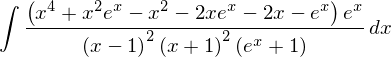

In [47]:
integ = sym.Integral((x**4 + x**2*sym.exp(x) - x**2 - 2*x*sym.exp(x) - 2*x - sym.exp(x))*sym.exp(x)/((x - 1)**2*(x + 1)**2*(sym.exp(x) + 1)), x) 
integ

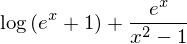

In [48]:
integ.doit()

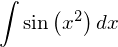

In [49]:
integ = sym.Integral(sym.sin(x**2), x)
integ

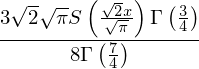

In [50]:
integ.doit()

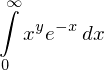

In [51]:
integ = sym.Integral(x**y*sym.exp(-x), (x, 0, sym.oo))
integ

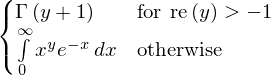

In [52]:
integ.doit()

This last example returned a `Piecewise` expression because the integral does not converge unless $\Re(y)>1$.

### Limits

SymPy can compute symbolic limits with the `limit` function. The syntax to compute $$\lim_{x\to x_0} f(x)$$ is `limit(f(x), x, x0)`.

In [5]:
x = sym.symbols('x')
sym.limit(sym.sin(x)/x, x, 0)

`limit` should be used instead of `subs` whenever the point of evaluation is a singularity. Even though SymPy has objects to represent $\infty$, using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, things like $\infty-\infty$ and $\dfrac{\infty}{\infty}$ return **nan** (not-a-number). For example

In [8]:
expr = x**2/sym.exp(x)
expr.subs(x, sym.oo)

In [10]:
sym.limit(expr, x, sym.oo)

Like `Derivative` and `Integral`, `limit` has an unevaluated counterpart, `Limit`. To evaluate it, use `doit`.

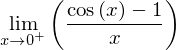

In [11]:
expr = sym.Limit((sym.cos(x) - 1)/x, x, 0)
expr

In [12]:
expr.doit()

To evaluate a limit at one side only, pass `'+'` or `'-'` as a fourth argument to `limit`. For example, to compute $$\lim_{x\to 0^{+}} \dfrac{1}{x}$$ do 

In [13]:
sym.limit(1/x, x, 0, '+')

As opposed to

In [14]:
sym.limit(1/x, x, 0, '-')

### Series expansion

SymPy can compute asymptotic series expansions of functions around a point. To compute the expansion of $f(x)$ around the point $x=x_0$ terms of order $x^n$, use `f(x).series(x, x0, n)`. `x0` and `n` can be omitted, in which case the defaults `x0=0` and `n=6` will be used.

Creating a series expansion of an undefined function. 

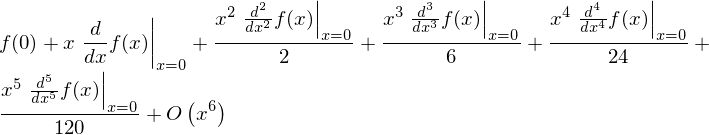

In [15]:
x = sym.symbols("x")
f = sym.Function("f")(x)
sym.series(f, x)

Another way to create a series expansion of an undefined function. 

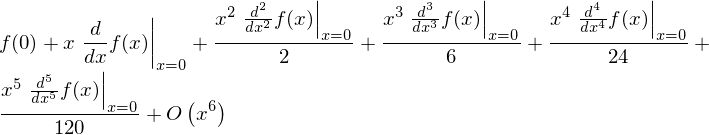

In [16]:
x = sym.symbols("x")
f = sym.Function("f")(x)
f.series(x)

Series expansion to order 2. 

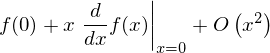

In [17]:
x = sym.symbols("x")
f = sym.Function("f")(x)
f.series(x, n=2)

Series expansion around point $x_0$.

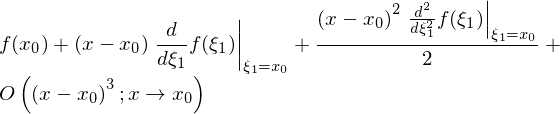

In [18]:
x, x0 = sym.symbols("x, x0")
f = sym.Function("f")(x)
f.series(x, x0, n=3)

Series with order object removed. 

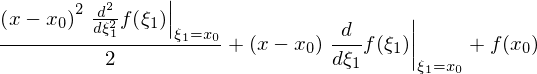

In [19]:
x, x0 = sym.symbols("x, x0")
f = sym.Function("f")(x)
f.series(x, x0, n=3).removeO()

Series expansion (of order equal to 9) of $cos(x)$ around $x=0$. 

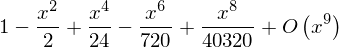

In [23]:
x = sym.symbols("x")
f = sym.cos(x)
f.series(x, 0, n=9)

Series expansion (of order equal to 4) of $e^{sin(x)}$ around $x=0$.

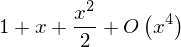

In [21]:
expr = sym.exp(sym.sin(x))
expr.series(x, 0, 4)

### Sum and product

A formal sum, delaying its evaluation. 

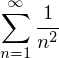

In [24]:
oo = sym.oo
n = sym.symbols("n", integer=True)
mysum = sym.Sum(1/n**2, (n, 1, oo))
mysum

Explicit evaluation of a formal sum. 

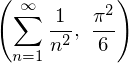

In [25]:
mysum, mysum.doit()

A formal product, delaying its evaluation. 

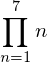

In [26]:
n = sym.symbols("n", integer=True)
myprod = sym.Product(n, (n, 1, 7))
myprod

Explicit evaluation of a formal product.

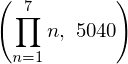

In [27]:
myprod, myprod.doit()

***
<a id=solvers></a>
# <font color=brown> Solvers</font>

Recall from the first section of this tutorial that symbolic equations in SymPy are not represented by `=` or `==`, but by `Eq`.

In [29]:
x, y, z = sym.symbols('x y z')
sym.Eq(x, y)

However, there is an even easier way. In SymPy, any expression not in an `Eq` is automatically assumed to equal $0$ by the solving functions. Since $a=b$ if and only if $a−b=0$, this means that instead of using `x == y`, you can just use `x - y`. For example

In [31]:
sym.solveset(sym.Eq(x**2, 1), x)

In [32]:
sym.solveset(sym.Eq(x**2 - 1, 0), x)

In [33]:
sym.solveset(x**2 - 1, x)

This is particularly useful if the equation you wish to solve is already equal to $0$. Instead of typing `solveset(Eq(expr, 0), x)`, you can just use `solveset(expr, x)`.

### Solving equations algebraically

The main function for solving algebraic equations is `solveset`. The syntax for `solveset` is `solveset(equation, variable=None, domain=S.Complexes)` where equations may be in the form of `Eq` instances or expressions that are assumed to be equal to zero.

Please note that there is another function called `solve` which can also be used to solve equations. The syntax is `solve(equations, variables)` However, it is recommended to use `solveset` instead.

When solving a single equation, the output of `solveset` is a `FiniteSet` or an `Interval` or `ImageSet` of the solutions.

In [44]:
x, y, z = sym.var('x, y, z')
sym.solveset(x**2 - x, x)

In [38]:
sym.solveset(x - x, x, domain=sym.S.Reals)

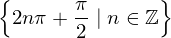

In [39]:
sym.solveset(sym.sin(x) - 1, x, domain=sym.S.Reals)

If there are no solutions, an `EmptySet` is returned and if it is not able to find solutions then a `ConditionSet` is returned.

In [41]:
sym.solveset(sym.exp(x), x) # no solution exists

In [42]:
sym.solveset(sym.cos(x) - x, x)  # not able to find solution

In the `solveset` module, the linear system of equations is solved using `linsolve`. In future we would be able to use `linsolve` directly from `solveset`. Following is an example of the syntax of `linsolve`.

List of equations form:

In [46]:
sym.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

Augmented matrix form:

In [48]:
sym.linsolve(sym.Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

$\boldsymbol{\mathrm{A}}\boldsymbol{x} = \boldsymbol{b}$ form:

In [50]:
M = sym.Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
sym.linsolve(system, x, y, z)

**Note:** The order of solution corresponds the order of given symbols.

In the `solveset` module, the non linear system of equations is solved using `nonlinsolve`. Following are examples of `nonlinsolve`.

When only real solution is present:

In [52]:
a, b, c, d = sym.symbols('a, b, c, d', real=True)

In [53]:
sym.nonlinsolve([a**2 + a, a - b], [a, b])

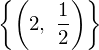

In [55]:
sym.nonlinsolve([x*y - 1, x - 2], x, y)

When only complex solution is present:

In [56]:
sym.nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

When both real and complex solution are present:

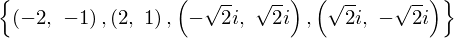

In [59]:
system = [x**2 - 2*y**2 -2, x*y - 2]
vars = [x, y]
sym.nonlinsolve(system, vars)

When the system is positive-dimensional system (has infinitely many solutions):

In [60]:
sym.nonlinsolve([x*y, x*y - x], [x, y])

In [62]:
system = [a**2 + a*c, a - b]
sym.nonlinsolve(system, [a, b])

`solve`, returning the solutions in dictionary form.

In [63]:
x, y = sym.symbols("x, y")
expr1 = x**2 - y**2 - 4 
expr2 = x**2 + y**2 - 4
solns = sym.solve([expr1, expr2],[x,y], dict=True)
solns

Checking solutions using `subs`.

In [64]:
[expr1.subs(soln) == 0 and expr2.subs(soln) == 0 for soln in solns]

[True, True]

### Solving differential equations

To solve differential equations, use `dsolve`. First, create an undefined function by passing `cls=Function` to the `symbols` function.

In [67]:
f, g = sym.symbols('f g', cls=sym.Function)

`f` and `g` are now undefined functions. We can call `f(x)`, and it will represent an unknown function.

In [68]:
f(x)

Derivatives of `f(x)` are unevaluated.

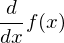

In [69]:
f(x).diff(x)

To represent the differential equation $f''(x)−2f'(x)+f(x)=\sin(x)$, we would thus use

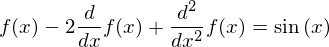

In [72]:
diffeq = sym.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sym.sin(x))
diffeq

To solve the ODE, pass it and the function to solve for to `dsolve`.

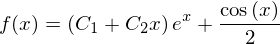

In [73]:
sym.dsolve(diffeq, f(x))

`dsolve` returns an instance of `Eq`. This is because in general, solutions to differential equations cannot be solved explicitly for the function.

In [75]:
sym.dsolve(f(x).diff(x)*(1 - sym.sin(f(x))) - 1, f(x))

The arbitrary constants in the solutions from `dsolve` are symbols of the form `C1`, `C2`, `C3`, and so on.

***
<a id=linear_algebra></a>
# <font color=brown> Linear Algebra</font>

### Matrices

A simple column matrix (column vector). 

In [78]:
sym.Matrix([1,2])

A simple row matrix (row vector). 

In [79]:
sym.Matrix([[1,2]])

A simple $2\times2$ matrix. 

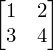

In [80]:
sym.Matrix([[1,2],[3,4]])

Creating a matrix using `lambda` function of rows and columns. 

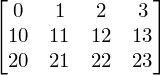

In [82]:
sym.Matrix(3, 4, lambda m, n: 10*m + n)

A symbolic matrix. 

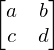

In [83]:
a, b, c, d = sym.symbols("a, b, c, d")
M = sym.Matrix([[a,b],[c,d]])
M

Several constructors exist for creating common matrices. To create an identity matrix, use `eye.eye(n)`, it will create an $n\times n$ identity matrix.

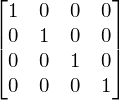

In [84]:
sym.eye(4)

To create a matrix of all zeros, use `zeros.zeros(n, m)`, it creates an $n\times m$ matrix of 0s.

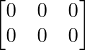

In [85]:
sym.zeros(2, 3)

Similarly, `ones` creates a matrix of ones.

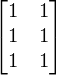

In [88]:
sym.ones(3, 2)

To create diagonal matrices, use `diag`. The arguments to `diag` can be either numbers or matrices. A number is interpreted as a $1\times1$ matrix. The matrices are stacked diagonally. The remaining elements are filled with 0s.

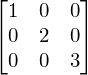

In [90]:
sym.diag(1, 2, 3)

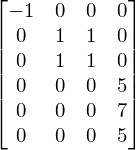

In [91]:
sym.diag(-1, sym.ones(2, 2), sym.Matrix([5, 7, 5]))

### Matrix operations and functions

Here are some basic operations on `Matrix`. To get the shape of a matrix use `shape`.

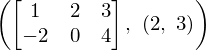

In [101]:
M = sym.Matrix([[1, 2, 3], [-2, 0, 4]])
M, M.shape

To get an individual row or column of a matrix, use `row` or `col`. For example, `M.row(0)` will get the first row. `M.col(-1)` will get the last column.

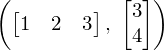

In [102]:
M.row(0), M.col(-1)

To delete a row or column, use `row_del` or `col_del`. These operations will **modify** the matrix **in place**.

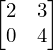

In [103]:
M.col_del(0)
M

In [104]:
M.row_del(1)
M

To insert rows or columns, use `row_insert` or `col_insert`. These operations **do not operate in place**.

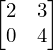

In [105]:
M = M.row_insert(1, sym.Matrix([[0, 4]]))
M

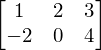

In [106]:
M = M.col_insert(0, sym.Matrix([1, -2]))
M

Basic matrix algebra. 

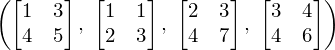

In [107]:
A = sym.Matrix([[1,2],[3,4]])
B = sym.Matrix([[0,1],[1,1]])
A+B, A-B, A*B, B*A

Determinant. 

In [108]:
A = sym.Matrix([[1,2],[3,4]])
A.det()

Trace.

In [109]:
A = sym.Matrix([[1,2],[3,4]])
A.trace()

Transposed matrix. 

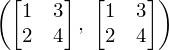

In [110]:
A = sym.Matrix([[1,2],[3,4]])
A.transpose(), A.T

Adjoint matrix. 

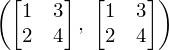

In [111]:
A = sym.Matrix([[1,2],[3,4]])
A.adjoint(), A.H

Inverse matrix. 

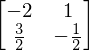

In [112]:
A = sym.Matrix([[1,2],[3,4]])
A.inv()

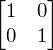

In [113]:
A*A.inv()

Matrix norm.

In [114]:
A = sym.Matrix([[1,2],[3,4]])
A.norm()

Rank of a matrix. 

In [115]:
A = sym.Matrix([[1,2],[3,4]])
A.rank()

LU decomposition. 

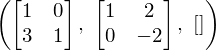

In [116]:
A = sym.Matrix([[1,2],[3,4]])
A.LUdecomposition()

QR decomposition. 

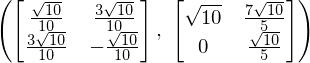

In [117]:
A = sym.Matrix([[1,2],[3,4]])
A.QRdecomposition()

Solution to $\boldsymbol{\mathrm{A}}\boldsymbol{x} = \boldsymbol{b}$. 

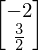

In [118]:
A = sym.Matrix([[1,2],[3,4]])
b = sym.Matrix([1,0])
A.solve(b)

Solving $\boldsymbol{\mathrm{A}}\boldsymbol{x} = \boldsymbol{b}$, using LU factorization. 

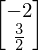

In [119]:
A = sym.Matrix([[1,2],[3,4]])
b = sym.Matrix([1,0])
A.LUsolve(b)

Solving $\boldsymbol{\mathrm{A}}\boldsymbol{x} = \boldsymbol{b}$, using QR factorization. 

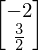

In [120]:
A = sym.Matrix([[1,2],[3,4]])
b = sym.Matrix([1,0])
A.QRsolve(b)

Matrix diagonalization. 

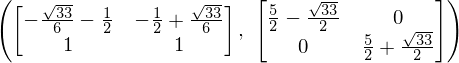

In [121]:
A = sym.Matrix([[1,2],[3,4]])
A.diagonalize()

Eigenvalues (with their multiplicities), eigenvectors. 

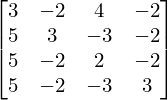

In [130]:
M = sym.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

In [131]:
M.eigenvals()

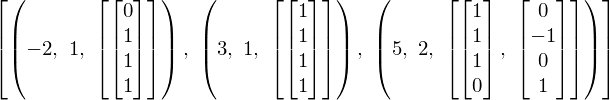

In [133]:
M.eigenvects()

Singular values. 

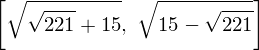

In [123]:
A = sym.Matrix([[1,2],[3,4]])
A.singular_values()

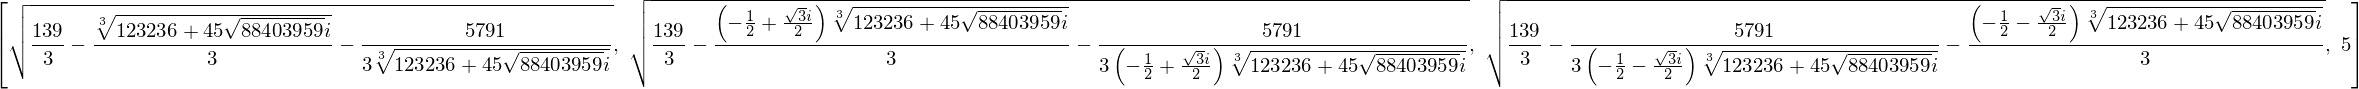

In [132]:
 M.singular_values()

Nullspace of a matrix. 

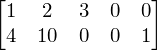

In [124]:
M = sym.Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M

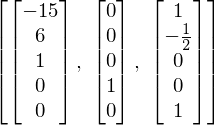

In [125]:
M.nullspace()

Columnspace of a matrix. 

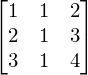

In [128]:
M = sym.Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
M

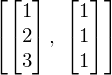

In [129]:
M.columnspace()

***
<a id=references></a>
# <font color=brown> References</font>

* This tutorial was created with the help of official [SymPy tutorial](https://docs.sympy.org/latest/tutorial/index.html) and also thanks to [Eric West](https://github.com/EricJWest/). 